In [11]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV файла
df = pd.read_csv('Country-data.csv')
print(df.head())


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [13]:
# EDA анализ датасета

# Получение общей информации 
# Просмотр первых нескольких строк DataFrame
print(df.head())

# Получение информации о DataFrame
print(df.info())

# Получение статистики по числовым столбцам
print(df.describe())


               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-nul

In [15]:
df.shape

(167, 10)

In [17]:
# Проверка на пропуски в данных
print(df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [19]:
#Проверка на повторяющиеся значения 
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [21]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
df = df.drop(non_numeric_columns, axis=1)

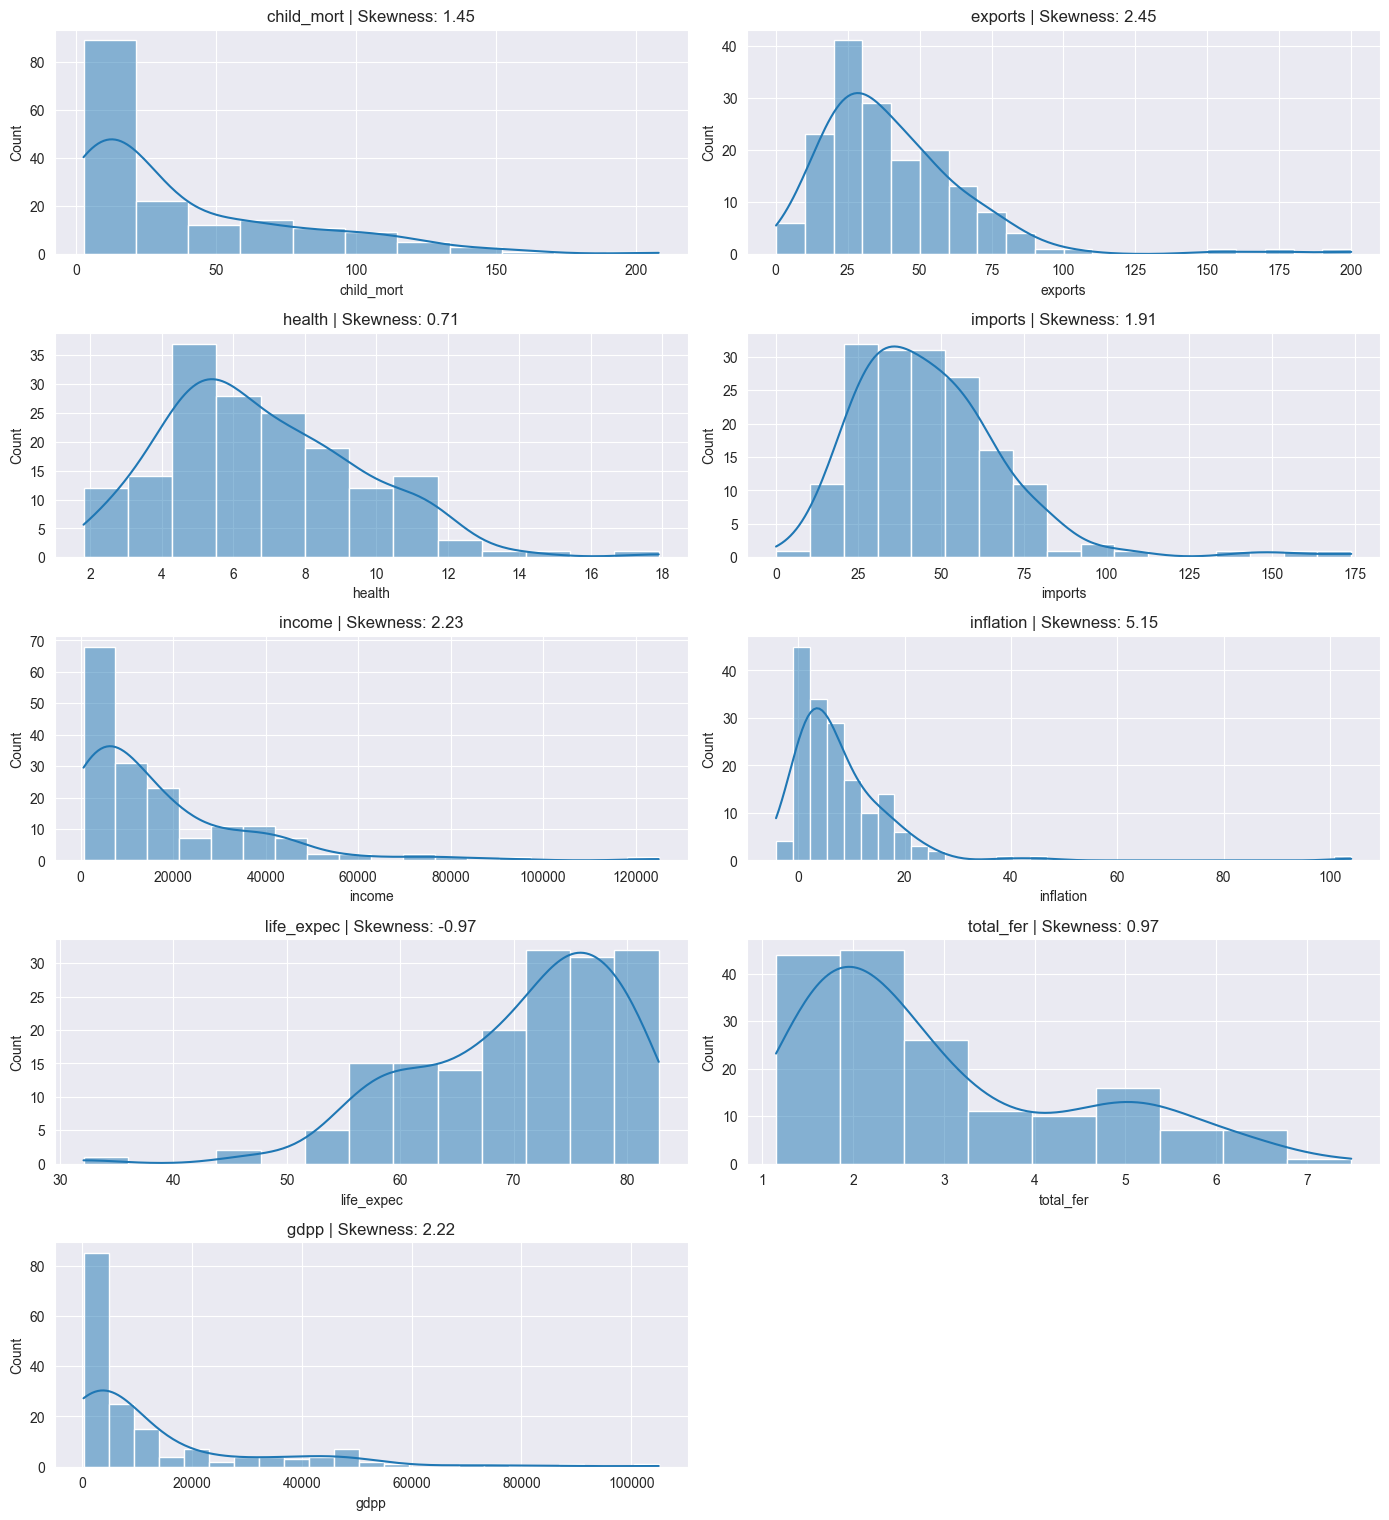

In [23]:
# Гистограммы для числовых переменных (распределение данных)
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

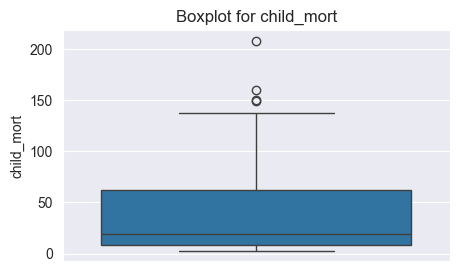

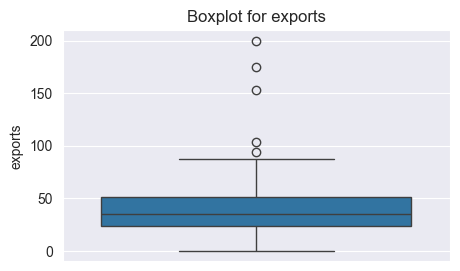

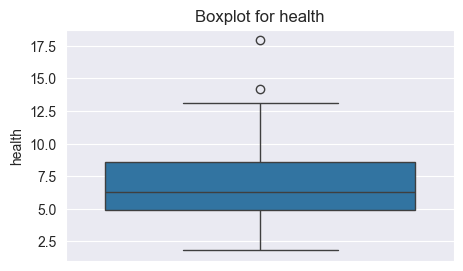

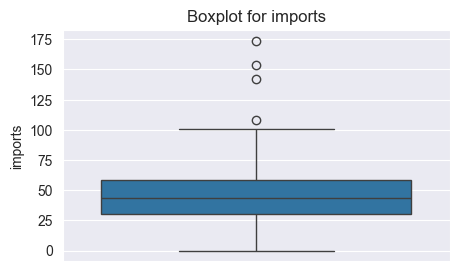

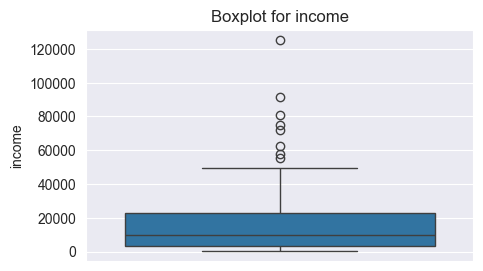

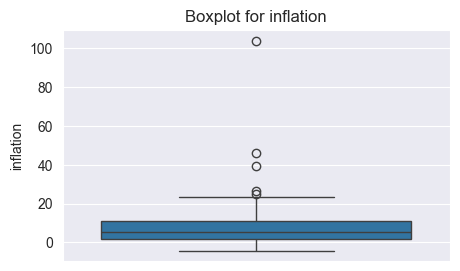

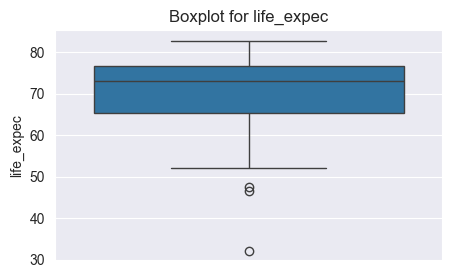

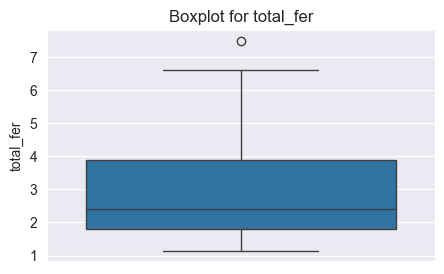

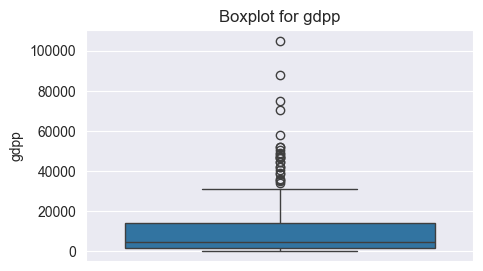

In [25]:
# Создание боксплотов (ящиков с усами) для числовых столбцов
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])  
    plt.title(f'Boxplot for {column}')
    plt.show()

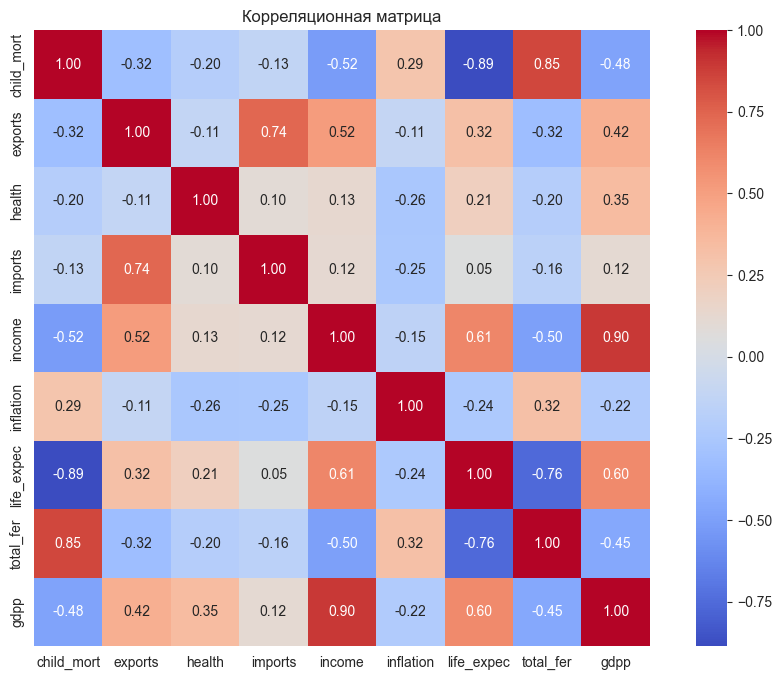

In [27]:
# 8. Корреляционный анализ
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

<Figure size 1000x600 with 0 Axes>

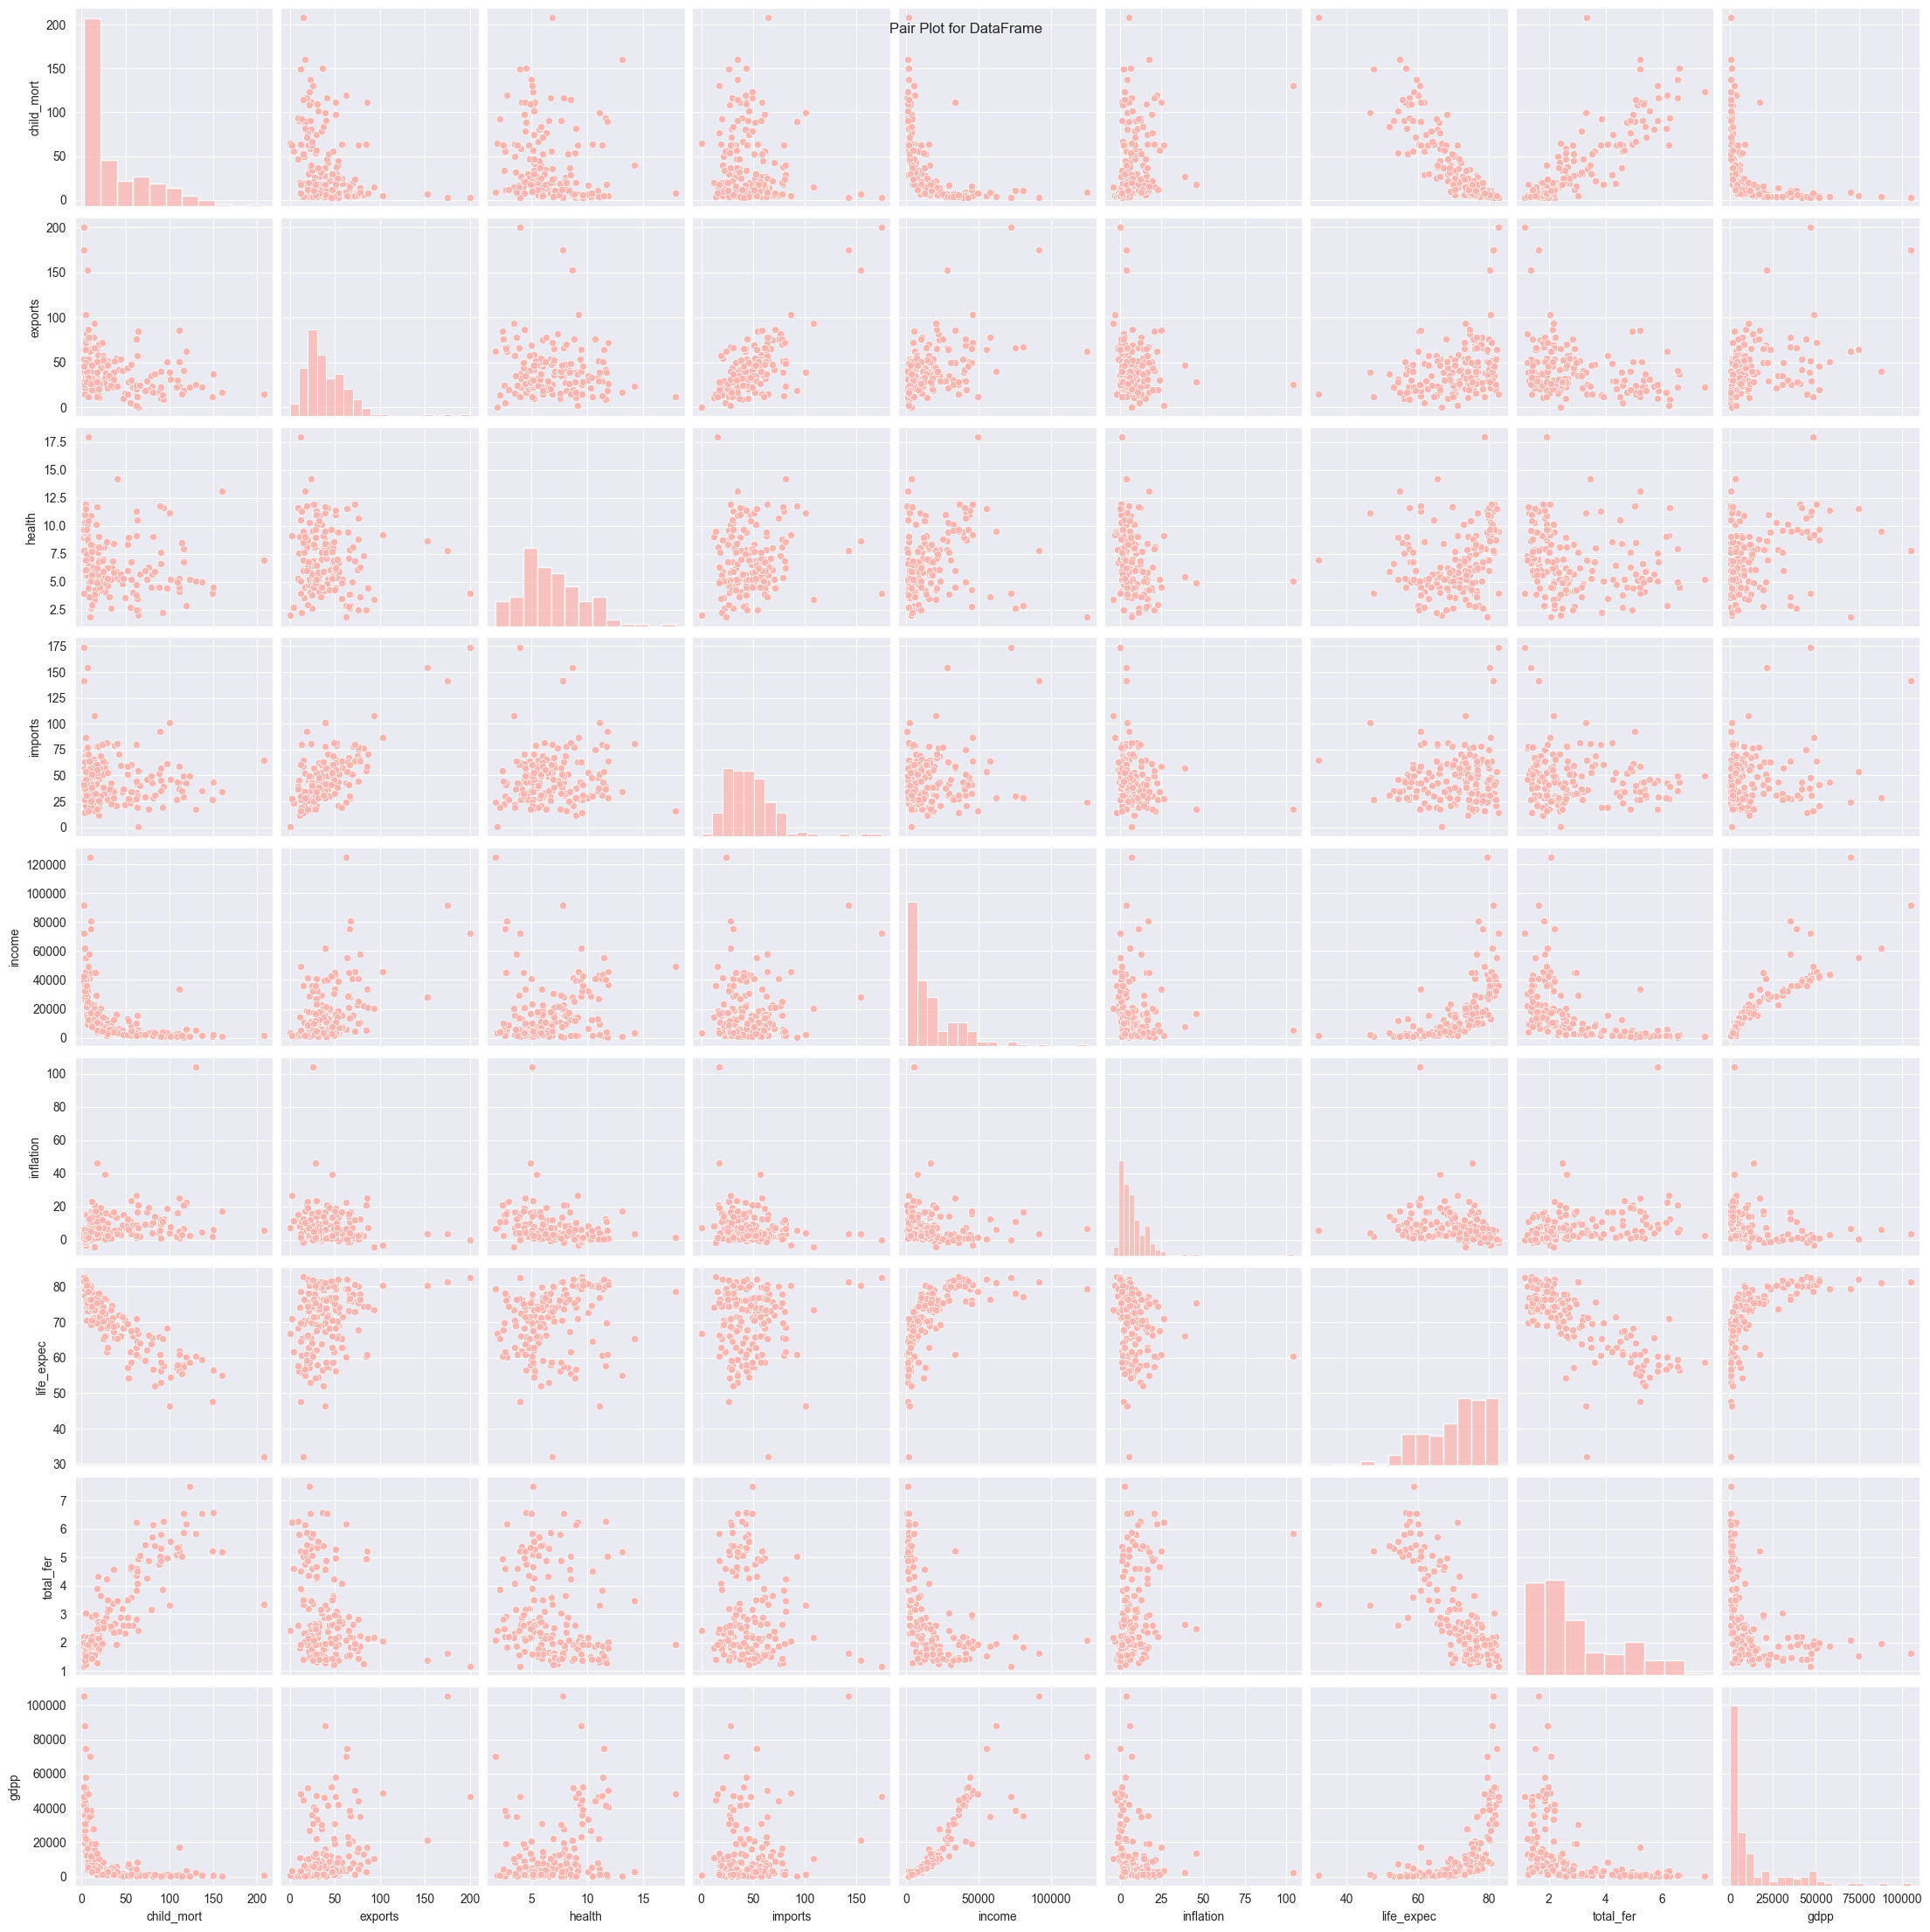

In [29]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

In [61]:
#Подготовка данных для машинного обучения
from sklearn.preprocessing import StandardScaler
# Стандартизация данных
scaler = StandardScaler()
X =  scaler.fit_transform(df)

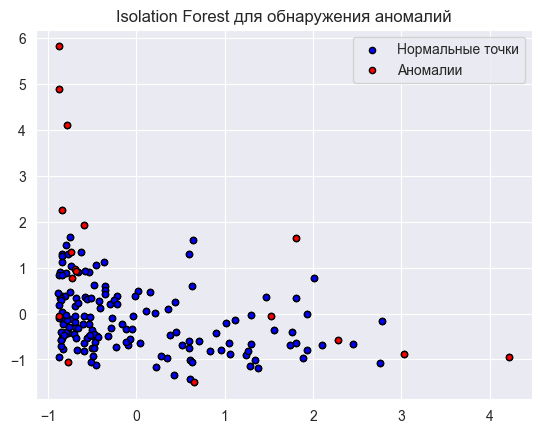

In [63]:
# Детекция аномалий
# Построение модели Isolation Forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1, random_state=42) #  параметр contamination=0.1 означает, что мы ожидаем  примерно 10% данных будут аномалиями.
clf.fit(X)
y_pred = clf.predict(X)

# Отображение результатов
plt.title("Isolation Forest для обнаружения аномалий")
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')

# Отображение нормальных точек
normal_points = X[y_pred == 1]
plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', s=20, edgecolor='k', label="Нормальные точки")

# Отображение аномалий
anomalies = X[y_pred == -1]
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=20, edgecolor='k', label="Аномалии")

plt.legend()
plt.show()

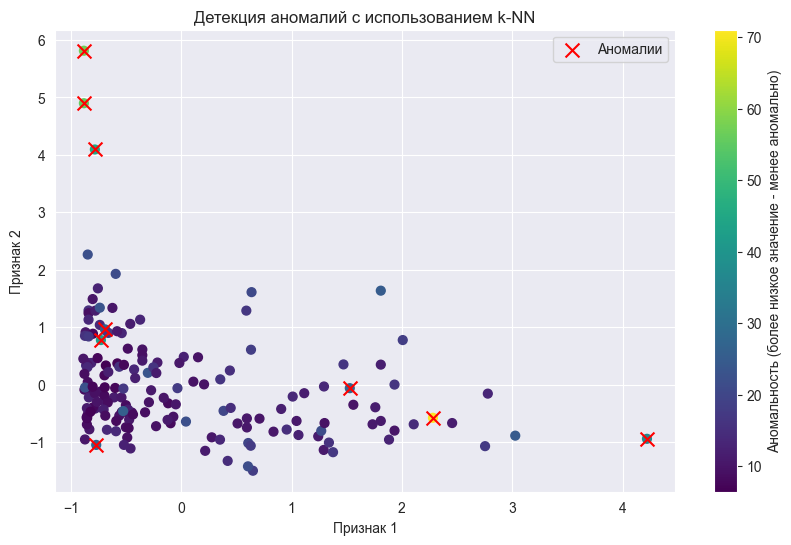

In [65]:
# Детекция аномалий при помощи knn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Определяем число ближайших соседей (k)
k = 10

# Обучаем модель k-NN
knn = NearestNeighbors(n_neighbors=k)
knn.fit(X)

# Вычисляем расстояния и индексы k ближайших соседей для каждой точки
distances, indices = knn.kneighbors(X)

# Вычисляем метрику аномальности (количество соседей, находящихся на минимальном расстоянии)
anomaly_scores = np.sum(distances, axis=1)

# Определяем пороговое значение для определения аномалий (например, 95-й процентиль)
threshold = np.percentile(anomaly_scores, 95)

# Визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='viridis', s=40)
plt.colorbar(label='Аномальность (более низкое значение - менее аномально)')
plt.title('Детекция аномалий с использованием k-NN')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# Выделяем аномальные точки
anomalies = X[anomaly_scores > threshold]
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', marker='x', s=100, label='Аномалии')
plt.legend()

plt.show()

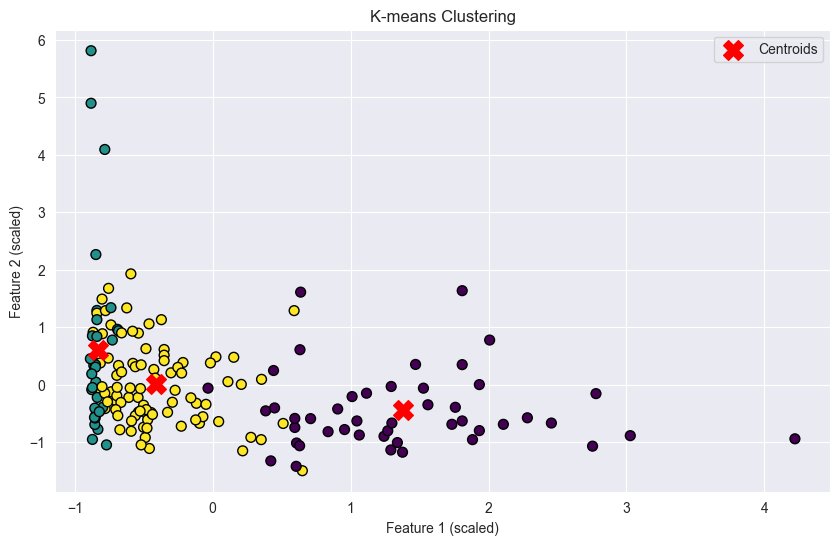

Silhouette Score: 0.37
Davies-Bouldin Score: 1.08
Calinski-Harabasz Score: 81.64


In [67]:
# Реализация алгоритмов кластеризации

# K-Means (3 кластера)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Определение количества кластеров
n_clusters = 3  # Задайте количество кластеров, которое вы хотите использовать

# 5. Кластеризация K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# 6. Визуализация кластеров (для двухмерных данных)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()


# 7. Оценка качества кластеризации
silhouette_avg = silhouette_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}')


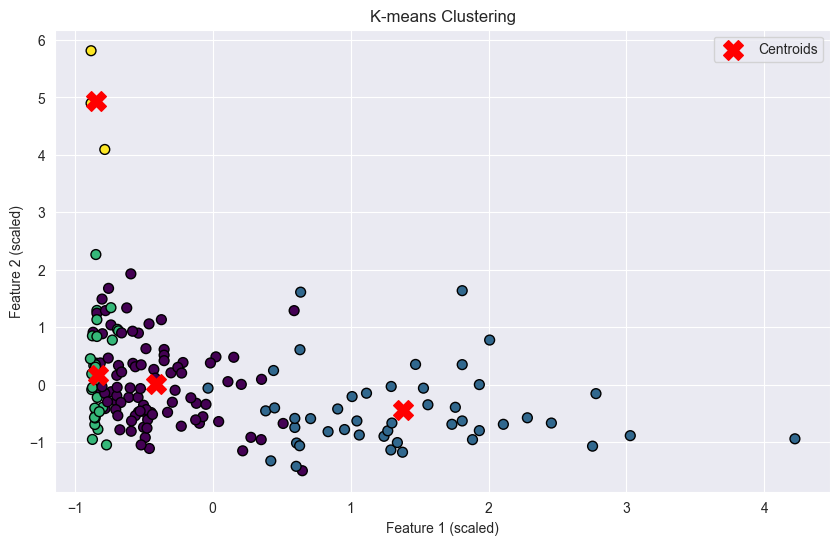

Silhouette Score: 0.38
Davies-Bouldin Score: 0.94
Calinski-Harabasz Score: 75.22


In [69]:
# K-Means (4 кластера)

# Определение количества кластеров
n_clusters = 4 

#  Кластеризация K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Визуализация кластеров 
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()

# Оценка качества кластеризации
silhouette_avg = silhouette_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}')

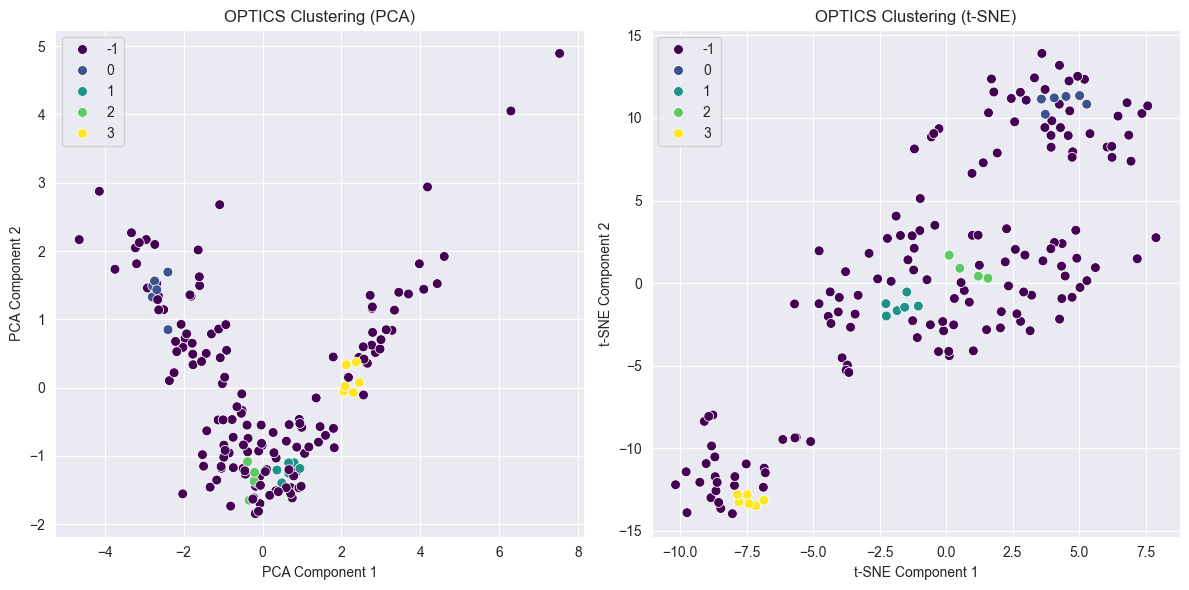

Silhouette Score: -0.33792393003795285
Davies-Bouldin Score: 1.6682225562607318
Calinski-Harabasz Score: 3.7123360927513356


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage


# Кластеризация с использованием OPTICS
optics = OPTICS(min_samples=4)
labels = optics.fit_predict(X)

# Визуализация с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)
plt.title('OPTICS Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis', s=50)
plt.title('OPTICS Clustering (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


# Оценка кластеров
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')


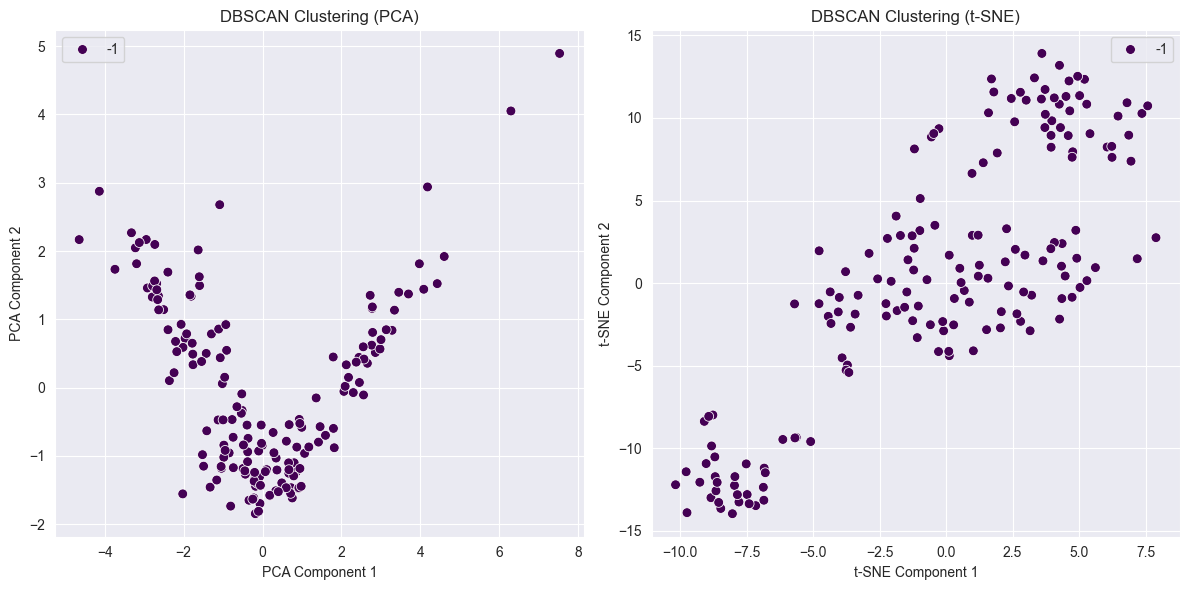

Недостаточно кластеров для оценки.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Кластеризация с использованием DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=10)  
labels = dbscan.fit_predict(X)

# Визуализация с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis', s=50)
plt.title('DBSCAN Clustering (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

# Оценка кластеров
if len(set(labels)) > 1:  # Проверяем, есть ли хотя бы два кластера для оценки
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Score: {davies_bouldin}')
    print(f'Calinski-Harabasz Score: {calinski_harabasz}')
else:
    print("Недостаточно кластеров для оценки.")

Silhouette Score: 0.3601106270914663
Davies-Bouldin Score: 1.0912755259084737
Calinski-Harabasz Score: 81.05675714118482


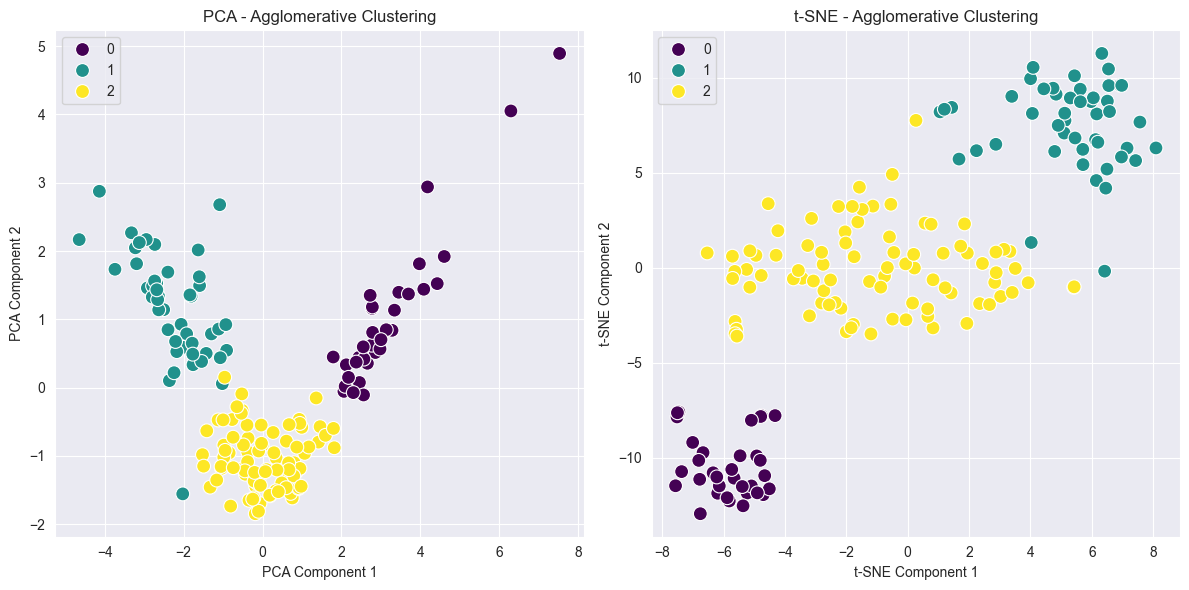

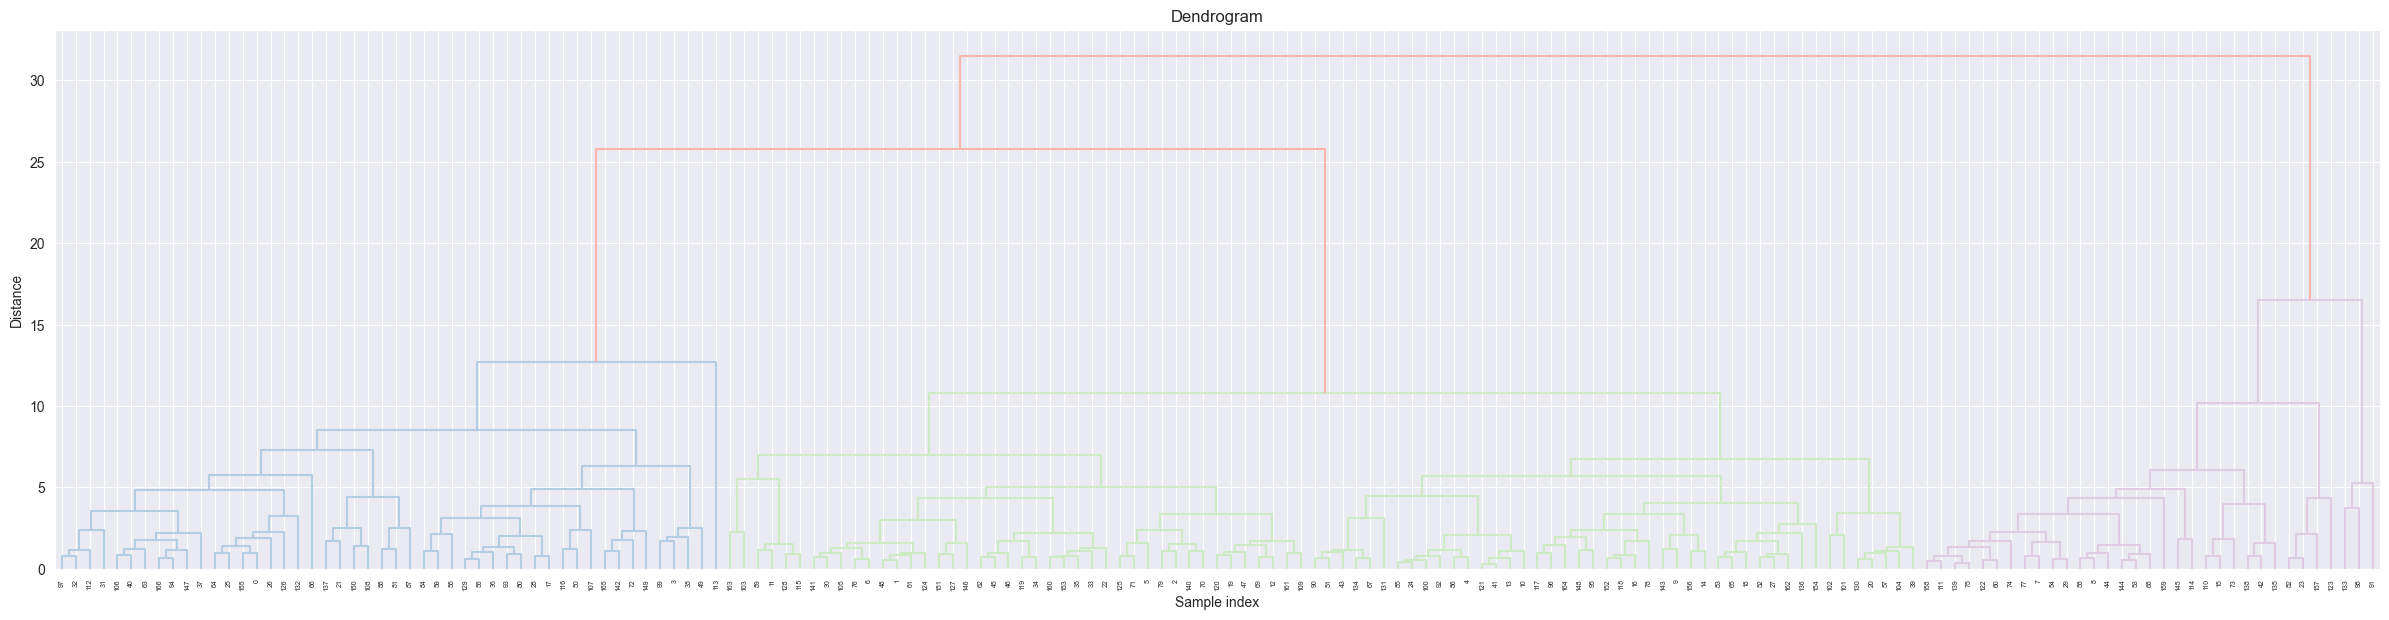

In [75]:
# Аггломеративная кластеризация
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage


# Модель
n_clusters = 3  # Задайте количество кластеров
agglo = AgglomerativeClustering(n_clusters=n_clusters)
labels = agglo.fit_predict(X)

# Оценка качества кластеризации
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')

# Визуализация с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100)
plt.title('PCA - Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Визуализация с помощью t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis', s=100)
plt.title('t-SNE - Agglomerative Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

# Построение дендрограммы
plt.figure(figsize=(30, 7))
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


Silhouette Score: 0.3654355518017844
Davies-Bouldin Score: 1.078555752378587
Calinski-Harabasz Score: 81.64123739103711


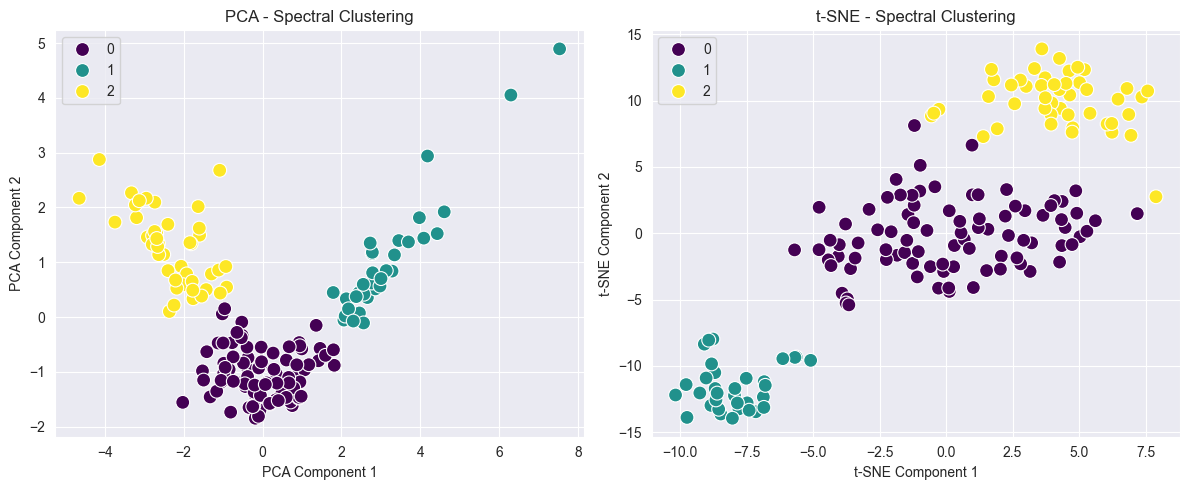

In [76]:
# Спектральная кластеризация
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Построение модели
n_clusters = 3  
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(X)

# Оценка качества кластеризации
silhouette_avg = silhouette_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)
calinski_harabasz = calinski_harabasz_score(X, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')

# Визуализация с использованием PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('PCA - Spectral Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Визуализация с использованием t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('t-SNE - Spectral Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()
